# Quality assessment of glacier mass change data from satellite observations: temporal/spatial resolution and uncertainty for glaciological, climatological and hydrological applications

- Data stream: satellite (observations)
- Quality area: spatial/temporal resolution, accuracy and precision (uncertainty)
- Application area: glaciological, climatological and/or hydrlogical applications, monitoring and models

Production date: 17-07-2024

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## Use case: Monitoring Greenland ice mass changes in the 21st century for usage in the context of Earth System modelling

## Quality assessment question: "Are the Greenland ice mass change data of sufficient accuracy, precision and spatial/temporal resolution to be used in glaciological, climatological, and/or hydrological modeling efforts?"

Ice sheets are a major contributor to current (and potentially future) global sea-level rise and can serve as clear indicators of ongoing climatic changes. Their changes furthermore play a key role in affecting (polar as well as global) ecosystems and several (feedback) mechanisms within the atmosphere, ocean and cryosphere. A proper assessment of ice sheet mass changes due to warming climatic conditions therefore plays a crucial role in dealing with these issues. In that regard, the 'Gravimetric mass balance data for the Antarctic (AIS) and Greenland (GrIS) ice sheets from 2003 to 2022 derived from satellite observations' dataset provides key information with respect to ice sheet mass change data for both the Greenland and Antarctic ice sheets. The dataset on the Climate Data Store (CDS) is based on satellite gravimetry, which enable mass changes to be measured regularly and consistently over the entire ice sheets. Remote sensing devices, such as used by the GRACE and GRACE-FO missions, are able to inspect directly and repeatedly large areas of ice. More particularly, the GRACE(-FO) missions are able to detect changes within the Earth’s gravitational field (resembling a redistribution of mass), and further processing of these data transforms this raw information into mass balance and mass change data (cumulative mass anomalies) of ice above buyoancy (Forsberg et al., 2017; Groh et al., 2019). Remote sensing techniques that use satellite data are therefore considered the only feasible manner to derive accurate mass change data of the remote ice sheets on a regular basis. This notebook investigates how well the resulting dataset can be used to monitor Greenland ice mass changes in the 21st century. More specifically, the notebook investigates whether the dataset is of sufficient maturity and quality for that purpose in terms of its accuracy and its spatial/temporal resolution. This will be evaluated within the context of, for example, using the mass change data for glaciological, climatological, and/or hydrological modelling efforts.

## 📌 Quality assessment statement

- Mass change detection by GRACE(-FO) is a useful tool to quantify the total ice mass change of the Greenland Ice Sheet (GrIS) but, however, it also has its limitations of which the user should take note before using the product. What GRACE(-FO) actually detects are patterns of mass redistribution, indicating that a material should be redistributed (e.g. by liquid discharge) in order for GRACE(-FO) to be able to detect the mass changes over certain locations. In that sense, an amount of melted ice being replaced by its mass-equivalent amount of meltwater at the same location would result in zero mass change. Only mass changes of ice above buoyancy are considered in the dataset, mass changes of floating ice and ice below buyoancy for ice grounded below sea level are not considered (which is, however, relatively limited for the GrIS). GRACE(-FO) data are considered to be the sum of mass changes driven by changing rates of solid ice discharge (i.e. the ice flux across the grounding line) and mass changes driven by changing rates of runoff and accumulation (basal, internal and surface conditions) at the basin-scale or ice sheet-wide scale.
- A large problem with the dataset is that no pixel-by-pixel mass change and error products are included for the ice sheets. However, time series data for various basins and the complete ice sheet are available from the data files. A spatial resolution at the basin-level is, however, clearly too coarse with respect to GCOS requirements (GCOS, 2022). Another issue with the data is the occurrence of (occasionally very) high error values. In some cases for the GrIS, monthly error estimates even exhibit values larger than 400 Gt. The main reason for these high uncertainty values is a combination of various factors that can impact the precision and accuracy of GRACE(-FO) measurements. These include errors related to measurement noise (e.g. due to leakage of the signal outside the region of interest due to the coarse resolution of GRACE(-FO) data acquisition), uncertainties related to the Earth’s gravitational field (e.g. due to the shift of the Earth’s center of mass, or due to the influence of the atmosphere and oceans on the Earth’s gravity field), uncertainties related to signals overlapping with ice mass changes, particularly glacial isostatic adjustment (GIA), a seasonal snow cover or hydrological processes over ice-free areas, etc. Users should also note that peripheral glaciers and ice caps are included in the GrIS mass change product. Data gaps are also present (e.g. during the transition period between GRACE and GRACE-FO in 2017-2018 CE). These are not filled up and not flagged, users need to identify them themselves. 
- Concerning the specific use case and user question, it is not possible to directly use GRACE(-FO) mass change data as input data into an ice sheet modeling framework due to the nature of the GMB data acqusition and the resulting product. GRACE(-FO) data pose several limitations that make it incompatible with the structure and physics of an ice sheet model that prognostically solves the continuity equation. The GRACE(-FO) data can, on the other hand, be used for other purposes such as the validation of mass change estimates from other independent methods and datasets. These include, amogst others, ice sheet-wide estimates from the mass budget method or the validation of the monthly/annual temporal variability of a surface mass balance model from a regional climate model for the entire GrIS. The data seem to be particularly well-suited for these purposes in terms of their temporal/spatial resolution. With respect to accuracy, users should take note of occasionally very high uncertainties.

## ❓ Methodology

### Short description

The total mass balance of an ice sheet is the difference between mass gained (from snow accumulation) and mass lost (by runoff or solid ice discharge across the grounding line), which is the same as the net mass change of the ice sheet. Remote sensing techniques, such as the use of satellites, are an important feature to derive and study the mass changes of the ice sheets. The 'Gravimetric mass balance data for the Antarctic and Greenland ice sheets from 2003 to 2020 derived from satellite observations' dataset provides monthly gravimetric mass balance (GMB) values and their uncertainty for the Greenland (GrIS) (and also the Antarctic Ice Sheet (AIS)). The data represent a time series of the cumulative mass changes (mass anomalies) of the ice above buoyancy of the ice sheets and their basins that are derived using satellite gravimetry data from the GRACE(-FO) missions. Data are available for the whole ice sheet, as well as at the basin level, but no gridded data are provided. Data are available since 2002 with units in Gt (Gigatonnes). For a more detailed description of the data acquisition and processing methods, we refer to the documentation on the CDS and the ECMWF Confluence Wiki.

### Structure and (sub)sections

As stated before, the applicability of ice sheet mass change data to be used in glaciological, climatological, and/or hydrological modeling efforts will be assessed in this notebook. We will check whether the data for Greenland are of sufficient adequacy in terms of its uncertainty (accuracy and precision) and its spatial/temporal resolution to be used for this purpose. This will be realized by analyzing the spatial and temporal characteristics of ice sheet mass change data and their uncertainty, by assessing the spatial and temporal resolution of the dataset, by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. monitoring Greenland ice sheet mass changes in the 21th century to be used for glaciological, climatological, and/or hydrological modelling efforts). The structure is as follows:

- **Data preparation and processing**: this section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Quantifying Greenland Ice Sheet mass changes in space and time**: this section derives (cumulative) ice sheet mass changes for Greenland since 2002 from GRACE-(FO) and expresses it as a time series for the entire ice sheet and its basins separately.
- **Ice sheet mass changes uncertainty estimates in space and time**: this section analyses the uncertainty term of the mass change change product for Greenland and assesses its characteristics in both space and time. We also express the uncertainty as a time series for the entire ice sheet and its basins.
- **Analysis of spatio-temporal resolution and coverage of the GRACE(-FO) mass change estimates**: this section further discusses the temporal and spatial coverage of the data in the ice sheet mass change product, and quantifies the amount of data gaps present.
- **Implications for use of GRACE(-FO) mass change data in glaciological, climatological, and/or hydrological modelling efforts**: the final section uses all information derived above to assess the suitability of the ice sheet mass change dataset (with respect to its accuracy and spatial/temporal coverage and resolution) to use the product for glaciological, climatological, and/or hydrological modelling efforts with respect to the Greenland Ice Sheet.

## 📋 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [413]:
import fsspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from scipy.stats import linregress
from matplotlib.gridspec import GridSpec
import re
from math import ceil
import pandas as pd
import calendar
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")
from c3s_eqc_automatic_quality_control import download

plt.style.use("seaborn-v0_8-notebook")

Then we define the parameters, i.e. for which ice sheet (or which basins of these ice sheets) we want the mass change data to be extracted:

In [414]:
variables = ["GrIS_total", "GrIS_1", "GrIS_2", "GrIS_3", "GrIS_4", "GrIS_5", "GrIS_6", "GrIS_7", "GrIS_8"]

Then we define requests for download from the CDS and download and transform the glacier mass change data.

In [415]:
collection_id = "satellite-ice-sheet-mass-balance"
request = {
    "variable": "all",
    "format": "zip",
}
ds = download.download_and_transform(collection_id, request)
ds_err = ds[[f"{var}_er" for var in variables]].compute()
ds = ds[variables].compute()
ds = xr.combine_by_coords([ds, ds_err])
print("Downloading done.")

100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Let us inspect the data:

In [416]:
ds

<xarray.Dataset> Size: 17kB
Dimensions:        (time: 216)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2002-04-16T20:23:54.375000 ... 2...
Data variables: (12/18)
    GrIS_total     (time) float32 864B 1.057e+03 1.123e+03 ... -3.762e+03
    GrIS_1         (time) float32 864B 54.15 42.37 52.4 ... -440.0 -471.2 -441.5
    GrIS_2         (time) float32 864B 97.2 125.0 43.44 ... 28.75 80.42 17.64
    GrIS_3         (time) float32 864B 219.8 216.2 132.5 ... -467.5 -533.6
    GrIS_4         (time) float32 864B 140.1 152.3 129.0 ... -548.1 -498.9
    GrIS_5         (time) float32 864B 76.06 68.17 53.5 ... -288.9 -316.6 -274.7
    ...             ...
    GrIS_3_er      (time) float32 864B 45.75 25.68 20.46 ... 16.83 18.87 19.34
    GrIS_4_er      (time) float32 864B 42.49 30.83 25.91 ... 18.51 18.26 22.87
    GrIS_5_er      (time) float32 864B 26.84 32.99 18.78 ... 12.84 11.66 11.76
    GrIS_6_er      (time) float32 864B 73.16 41.97 28.93 ... 22.61 24.26 25.49
    GrIS_7_er      (time) float32 864B 57.64 41.52 19.34 ... 23.11 25.23 26.11
    GrIS_8_er      (time) float32 864B 59.26 63.21 45.86 ... 22.68 22.85 21.76
Attributes:
    Title:                GMB for Greenland and Antarctica ice sheets from th...
    institution:          DTU Space - Geodesy and Earth Observations
    reference:            Baratta et al. (2016), Groh and Horwart (2016)
    file_creation_date:   Tue May 16 09:49:32 2023
    region:               Greenland and Antarctica
    missions_used:        GRACE and and GRACE-FO
    time_coverage_start:  Apr-2002
    time_coverage_end:    Dec-2022
    Tracking_id:          ab2360a4-82d5-42f3-babb-90ce976a8a8e
    netCDF_version:       NETCDF4
    product_version:      4.0
    Summary:              This data set is prepared for the C3S project, and ...

It is a dataset that consists of several time series data, containing cumulative values of the total ice sheet mass change (cumulative mass anomalies) of, in this notebook, the entire Greenland Ice Sheet (`GrIS_total`) or its basins (`GrIS_{basin_number}`), as well as their uncertainty (`GrIS_total_er` and `GrIS_{basin_number}_er`) since 2002. For basin definitions and delineation, see Zwally et al. (2012). Mass changes and their uncertainty are expressed in units of Gt and the time period between two measurements is variable but mostly at monthly-spaced intervals. Note that no gridded data are given in this dataset, and hence no spatial resolution can be derived. 

Let us perform some data handling before getting started with the analysis:

In [417]:
variables_to_drop = [var for var in ds.data_vars if '_er' in var]
ds = ds.drop_vars(variables_to_drop)

year_to_ns = 1.0e9 * 60 * 60 * 24 * 365
with xr.set_options(keep_attrs=True):
    ds = ds - ds.isel(time=0)
for var, da in ds.data_vars.items():
    da.attrs["region"] = da.attrs["long_name"].split("_", 1)[0].title()
    da.attrs["long_name"] = "Cumulative mass change"
for var_name, da in ds.data_vars.items():
    # Check if the variable name contains a number
    match = re.search(r'_(\d+)', var_name)
    if match:
        basin_number = match.group(1)
        da.attrs["region"] = f"Greenland basin {basin_number}"
    else:
        da.attrs["region"] = f"Cumulative mass change of the Greenland Ice Sheet from GRACE(-FO)"

for var, da in ds_err.data_vars.items():
    da.attrs["region"] = da.attrs["long_name"].split("_", 1)[0].title()
    da.attrs["long_name"] = "Mass change error"
for var_name, da in ds_err.data_vars.items():
    # Check if the variable name contains a number
    match = re.search(r'_(\d+)', var_name)
    if match:
        basin_number = match.group(1)
        da.attrs["region"] = f"Greenland basin {basin_number}"
    else:
        da.attrs["region"] = f"Mass change error of the Greenland Ice Sheet from GRACE(-FO)"

with xr.set_options(keep_attrs=True):
    ds_diff = ds.diff("time") / ds["time"].diff("time").astype(int)
    ds_diff *= year_to_ns / 12
for var_name, da in ds_diff.data_vars.items():
    # Check if the variable name contains a number
    match = re.search(r'_(\d+)', var_name)
    if match:
        basin_number = match.group(1)
        da.attrs["region"] = f"Greenland basin {basin_number}"
    else:
        da.attrs["region"] = f"Non-cumulative mass change of the Greenland Ice Sheet from GRACE(-FO)"
    da.attrs["long_name"] = "Mass change"


We also define a plotting function to visualize the time series:

In [418]:
def plot_timeseries(ds):
    variables = list(ds.data_vars.values())
    num_vars = len(variables)
    
    # Create a GridSpec layout with enough rows
    num_rows = (num_vars + 1) // 2  # Integer division, ensuring enough rows
    
    fig = plt.figure(figsize=(8, 3 * num_rows))
    gs = GridSpec(num_rows, 2, figure=fig)
    
    # Plot the first variable, spanning the first row
    ax = fig.add_subplot(gs[0, :])
    variables[0].plot(ax=ax, color='k')
    ax.set_title(f"{variables[0].attrs.get('region', '')}")
    ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
    ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)

    # Plot the remaining variables, two per row
    for i, da in enumerate(variables[1:], start=1):
        row = (i + 1) // 2
        col = (i + 1) % 2
        ax = fig.add_subplot(gs[row, col])
        da.plot(ax=ax, color='b',linewidth=1)
        ax.set_title(f"{da.attrs.get('region', '')}")
        ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
        ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig, gs


With everything ready, let us now start with the analysis:

### 📉 Quantifying Greenland Ice Sheet mass changes in space and time

We begin by plotting the Greenland Ice Sheet cumulative mass change $M_{GRACE}$ between the begin and end period with the defined plotting function:

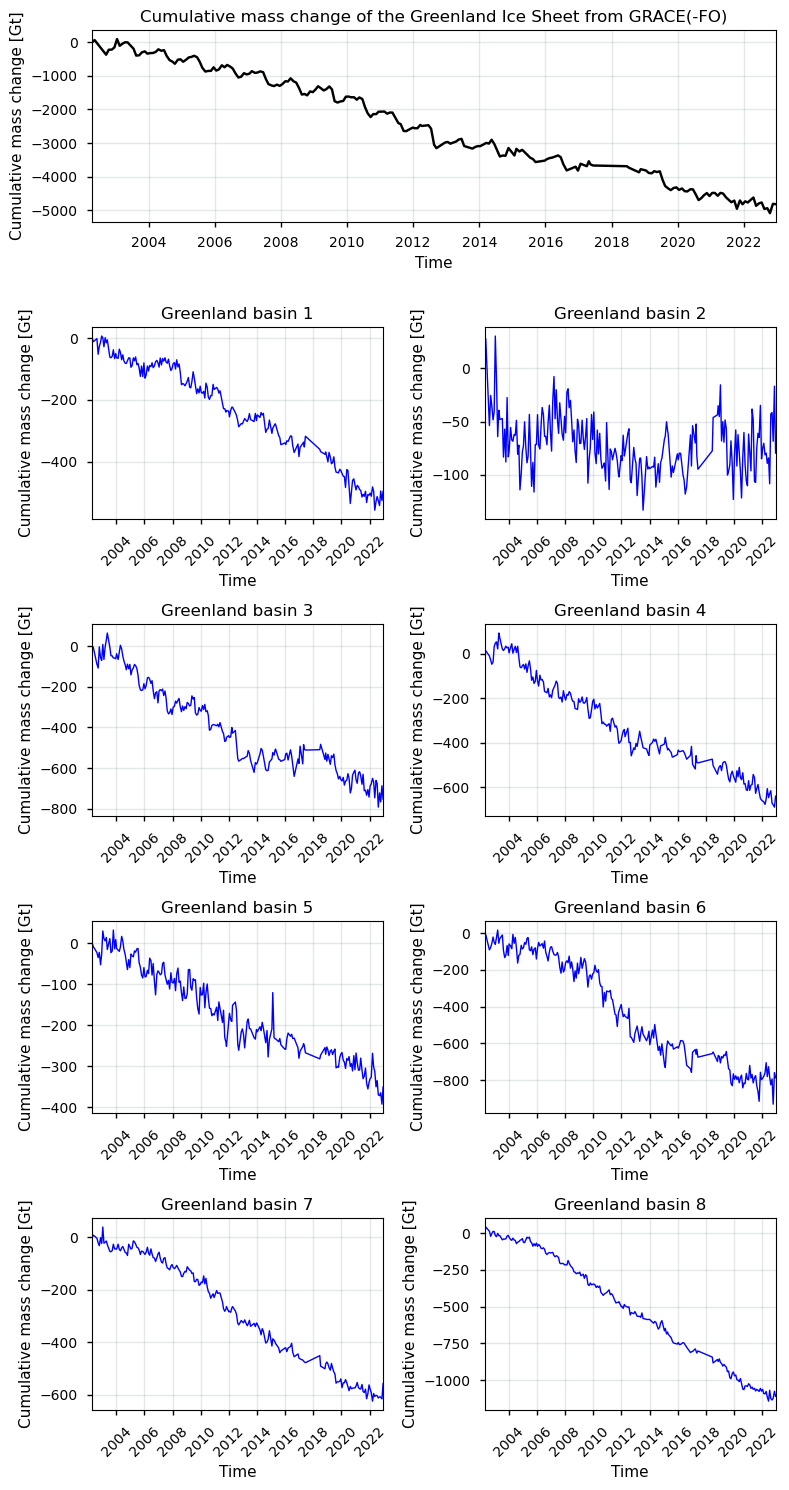

In [419]:
fig, gs = plot_timeseries(ds)

The mass changes and their errors derived from GRACE(-FO) are expressed in Gt (Gigatonnes). Since the Gt is a unit of mass, one Gt of ice weighs exactly the same as a Gt of water. It can also be translated into a volume, for example one Gt of water (density 1000 kg/m$^3$) is exactly one km$^3$, while one Gt of ice (density 917 kg/m$^3$) in volume becomes 1.091 km$^3$ of ice. GRACE(-FO) data are in fact considered to be the sum of mass changes driven by changing rates of solid ice discharge (i.e. by ice dynamics) and mass changes driven by changing rates of runoff and accumulation (basal, internal, as well as climatic conditions at the surface). What GRACE(-FO) actually detects are patterns of mass redistribution, indicating that a material should be redistributed (e.g. by liquid discharge) in order for GRACE(-FO) to be able to detect gravity anomalies and the corresponding mass changes over certain locations. In that sense, an amount of melted ice being replaced by its mass-equivalent amount of meltwater at the same location would result in zero mass change. Only ice mass changes of ice above buouyancy are considered in the dataset, mass changes of floating ice or ice below buoyancy for grounded below sea level are not considered (which is, however, relatively limited for the GrIS).

The provided graphs illustrate the cumulative mass change of the Greenland Ice Sheet from GRACE(-FO) data, highlighting a consistent decline in ice mass from 2002 onwards. The overall trend across all basins shows significant ice loss, indicating the profound impact of climate change. The first graph on top represents the cumulative mass change of the entire Greenland Ice Sheet. It shows a steady decline, underscoring the extensive ice loss over the last several decades (e.g. Sasgen et al., 2020). The subsequent graphs below detail the mass change in individual basins. Overall, these graphs highlight the significant and widespread loss of ice mass across the Greenland Ice Sheet, with different basins showing varying rates and patterns of ice loss. This variability could be due to regional climatic conditions, glacial dynamics (i.e. solid discharge), and other environmental factors. The findings underscore the critical state of the Greenland Ice Sheet, serving as a clear indicator of the impacts of climate change (Groh et al., 2019; Otosaka et al., 2023).

Let us now plot the data in a non-cumulative way (at variable-spaced time intervals, i.e. between two consecutive data acquisitions, which approximately equals 1 month):

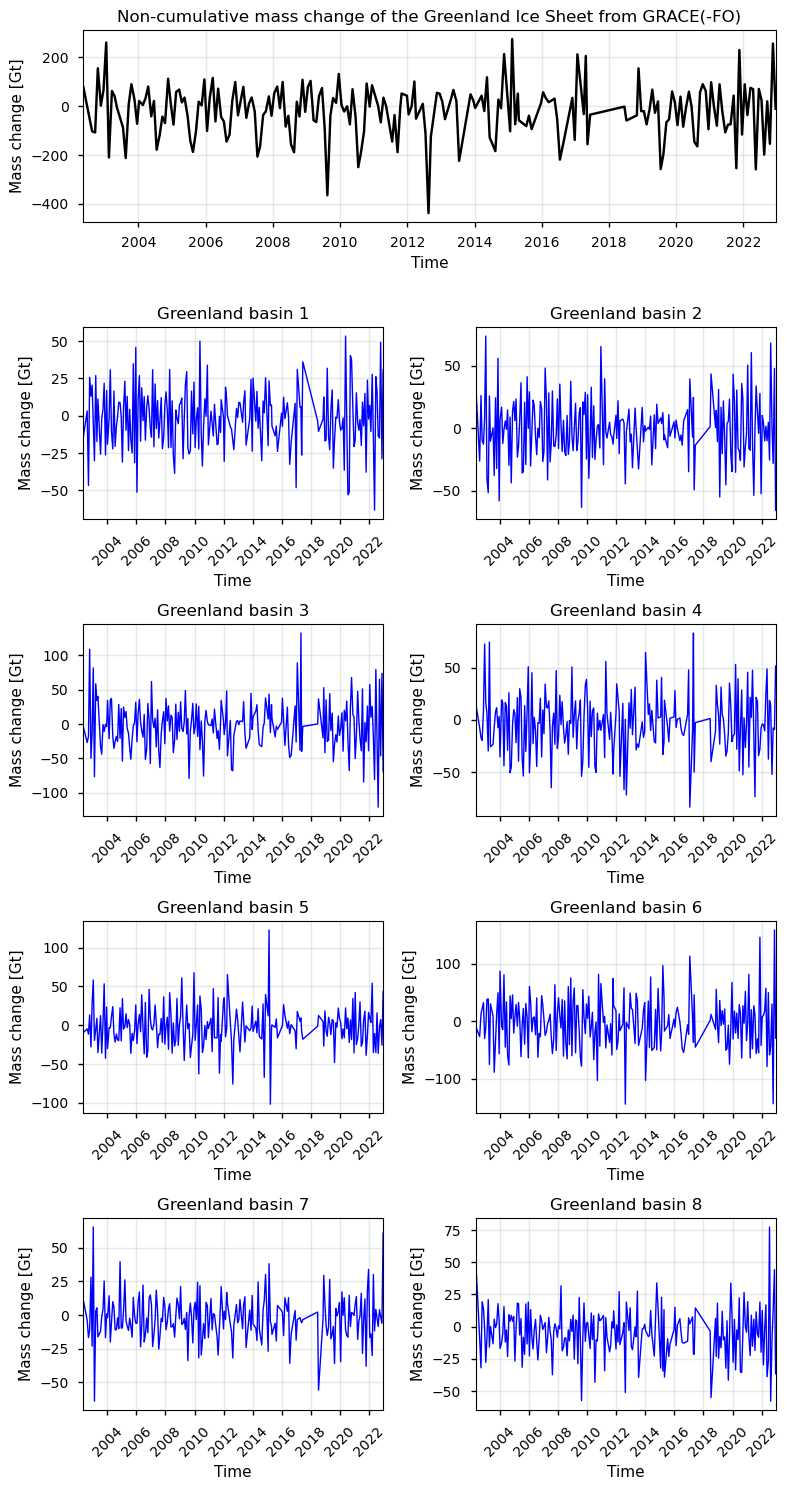

In [420]:
fig, axs = plot_timeseries(ds_diff)

Perhaps the pattern above becomes clearer if we group the mass changes of the entire ice sheet for each month during which a GRACE-(FO) mass change measurement took place. Therefore, a boxplot is created for each month to inspect the mass changes that occur within each distinct month:

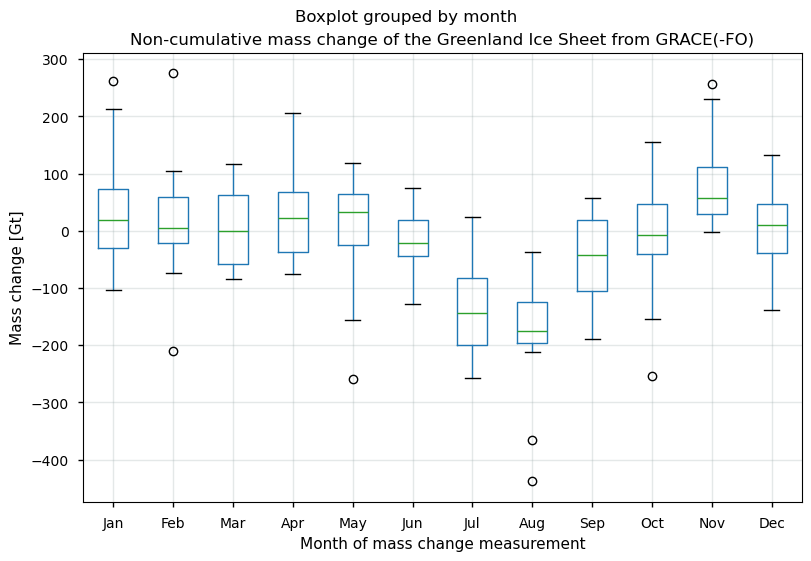

In [421]:
# Create the figure and axes for the plot
fig, ax = plt.subplots(layout="constrained")
# Get the first variable from ds_diff
first_var = next(iter(ds_diff.data_vars.values()))
# Convert the data array to a dataframe
df = first_var.to_dataframe()
# Add the month information
df["month"] = df.index.month
# Create the boxplot
df.boxplot(
    by="month",
    ax=ax,
    ylabel=f"{first_var.attrs['long_name']} [{first_var.attrs['units']}]",
    xlabel="Month of mass change measurement",
)
# Set the title and x-tick labels
ax.set_title(f"{first_var.attrs['region']}")
ax.set_xticklabels([calendar.month_abbr[m] for m in ax.get_xticks()])
ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
plt.show()


The months of the data may be biased, however, by the fact that the time period between two GRACE(-FO) measurements is slightly variable in time (see later). Nevertheless, the data suggests a clear seasonal pattern, with summer months showing more variability and larger negative changes due to higher melting rates, while winter months exhibit a tighter boxplot range, reflecting more stable conditions with slightly positive mass changes on average. These patterns are likely influenced by seasonal climatic factors, with warmer summer temperatures leading to increased melting and larger negative mass changes. The presence of outliers indicates occasional extreme events significantly affecting the ice sheet's mass, such as unusually warm periods or significant precipitation events.

Let us now explore the spatial and temporal resolution and coverage of the product:

### ✅ Analysis of spatio-temporal resolution and coverage of the GRACE(-FO) mass change estimates

Now that we have visualized the spatial and temporal patterns of mass changes, we can investigate the spatio-temporal resolution and extent of the GrIS mass changes to get an idea of the dataset’s maturity. Let us begin by identifying temporal data gaps (coverage) and the temporal resolution in the time series:

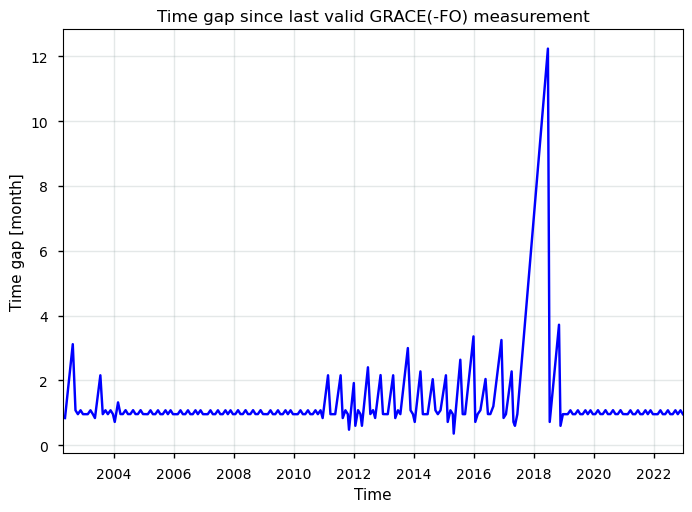

In [422]:
time_gap_months = 12 * ds["time"].diff("time").astype(int) / year_to_ns

# Create the plot
fig, ax = plt.subplots()
time_gap_months.plot(ax=ax, color='b')
ax.set_ylabel("Time gap [month]")
ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
ax.set_title("Time gap since last valid GRACE(-FO) measurement")
plt.show()

The plot above visualizes the time gaps in the GRACE(-FO) data collection, highlighting periods of consistent monthly data acquisition, increased variability in the measurements, and a significant data gap due to the GRACE-(FO) mission transition. The most prominent feature in the plot is the large spike in the time gap around 2017-2018, where the gap reaches up to 12 months. This significant gap corresponds to the end of the original GRACE mission and the transition period before the launch of the GRACE Follow-On (GRACE-FO) mission in May 2018. During this period, there was a hiatus in the data collection, as the original GRACE satellites were decommissioned and the new GRACE-FO satellites were not yet operational. Generally speaking, a temporal resolution of ca. 1 month (which is mostly the case) is noted, which is in agreement with the optimum requirement proposed by GCOS (2022). Because GRACE(-FO) results are always presented relative to something (i.e. the previous data acquisition or a reference time) and there is no systematic bias between the GRACE and GRACE-FO time series (Velicogna et al., 2020), it is, however, believed that these data gaps do not impact the overall magnitude of the cumulative mass balance anomaly of the time series.

Let us have this quantified:

In [423]:
start, end = ds["time"].isel(time=[0, -1]).dt.strftime("%d/%m/%Y").values.tolist()

for string, date in zip(("start", "end"), (start, end)):
    print(f"The {string:^5} date of the time series is", date)

expected = len(pd.date_range(start, end, freq="ME", inclusive="both"))
actual = len(set(ds["time"].dt.strftime("%Y%m").values))
for string, date in zip(("expected", "present"), (expected, actual)):
    print(f"The amount of months with mass change measurements that is {string} between these two dates is", date)

missing = 100 * abs(expected - actual) / expected
print(f"For a consistent monthly temporal resolution, the amount of months with missing data is {missing:.2f}%.")

The start date of the time series is 16/04/2002
The  end  date of the time series is 17/12/2022
The amount of months with mass change measurements that is expected between these two dates is 248
The amount of months with mass change measurements that is present between these two dates is 213
For a consistent monthly temporal resolution, the amount of months with missing data is 14.11%.


With respect to the spatial coverage, a major issue for the GrIS is whether to include or exclude the outlying peripheral glaciers and ice caps (which is for example not the case for the surface elevation change dataset on the Climate Data Store). The GRACE(-FO) GMB data, however, do account for the mass changes of all ice caps and glaciers over entire Greenland. This is due to the nature of GMB data acquisition, which cannot separate close ice mass bodies because of its coarse spatial resolution (several hundred kilometers) during the data acquisition. The contribution of Greenland's peripheral glaciers and ice caps is approximately 30-35 Gt/year (Otosaka et al., 2023). To exclude these areas from the GRACE(-FO) time series, a scaling factor of 0.84 is often used (Bolch et al., 2013; Colgan et al., 2015). The spatial resolution is complicated by the fact that no gridded data are available for download, although they exist through other sources (e.g. the TU Dresden website). However, data are only available as a time series at the ice sheet-wide and basin-scale, which is clearly too coarse with respect to GCOS requirements, and also complicates the use of the data in ice sheet models that often require gridded data. This information can nevertheless be important, as the mass changes in Greenland are clearly seen to be associated with relatively narrow marginal ice zones, especially in west and southeastern Greenland, and major outlet glaciers such as Jakobshavn and Helheim glaciers (Forsberg et al., 2017).

Additionally, GRACE(-FO) data has a relatively coarse spatial resolution during data acquisition, which can blur the boundaries between different basins and make it challenging to attribute mass changes to specific basins accurately (i.e. due to leakage errors), for example due to the nearby presence of Canadian ice caps. 

We can now move on to the error and uncertainty characterization of the product:

### ❄️ Ice sheet mass changes uncertainty estimates in space and time

The total error of a monthly ice sheet mass change estimate for Greenland is given by the sum of the precision (random) and the accuracy (systematic) error:

$
\varepsilon = \sigma + \delta
$
where $\sigma$ is the standard deviation (random error) and $\delta$ the accuracy (systematic) error. 

For the GrIS, the product deals with both precision and accuracy errors in its final error estimates (Barletta et al., 2013). The precision error accounts for the statistically distributed random error around one average value. The accuracy error accounts for how much the expected value deviates from the “true” value. For the precision error, the 95% confidence interval (1.96$\sigma$) propagated from the data, is provided. Therefore, in the case for the GrIS, the total uncertainty of the data is given by $\varepsilon$. Hence, in the C3S products the most complete error estimate that was evaluated by Barletta et al. (2013) was given. The study reports that roughly half (ca. 50%) of the total error is attributed to the precision error, the other half is the accuracy error in the monthly error estimate. In the following section below, we will thus consider the uncertainty of the dataset as being $\varepsilon_{M_{GRACE}}$.

Let us plot a time series of the errors:

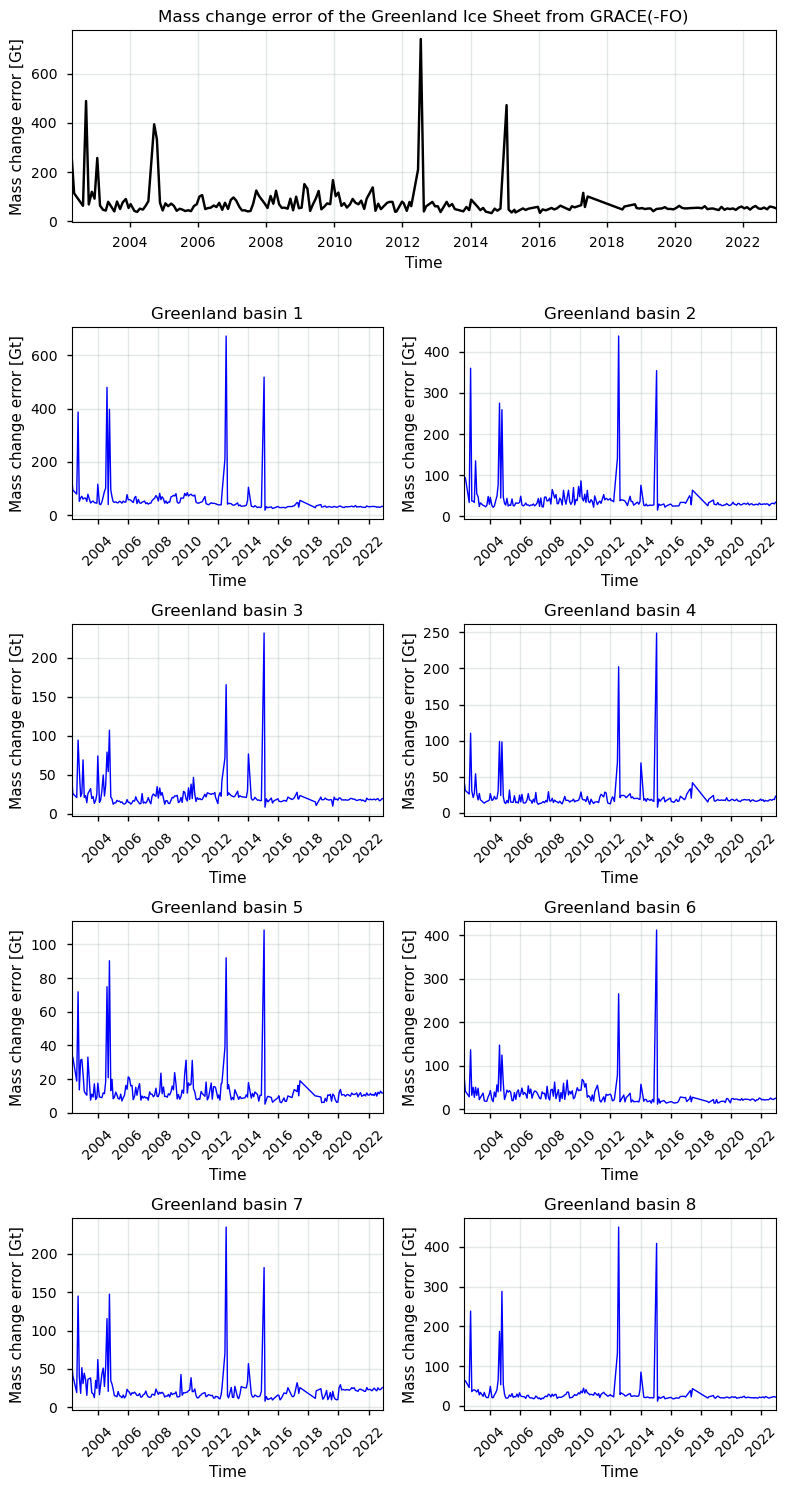

In [424]:
fig, axs = plot_timeseries(ds_err)

Note that these values are not normalized to a certain time period, as the time gap between two measurements is (slightly) variable. Uncertainties in GRACE ice mass change estimates are occasionally very high and arise from various sources. These include, amongst others, errors related to measurement noise (e.g. due to leakage of the signal outside the region of interest, such as the Canadian ice caps, due to the coarse resolution of GRACE(-FO) data acquisition), uncertainties related to the Earth's gravitational field (e.g. due to the shift of the Earth's center of mass, or due to the influence of the atmosphere and oceans on the Earth's gravity field), uncertainties related to signals overlapping with ice mass changes, particularly glacial isostatic adjustment (GIA), etc. as mentioned before.

Let us plot mass change time series with error bars:

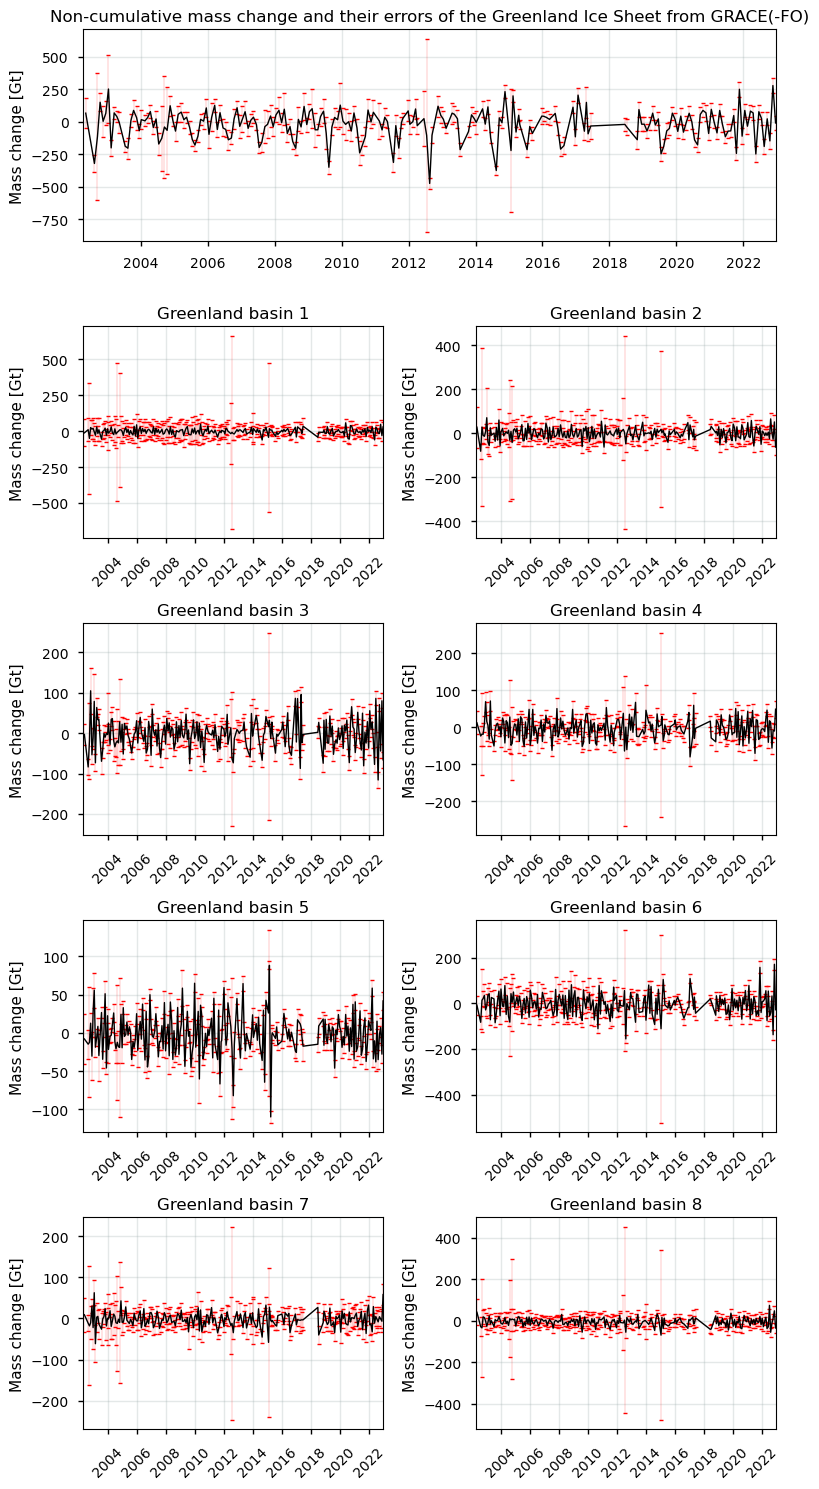

In [425]:
# Assuming ds and ds_err 

variables = list(ds.data_vars.values())
num_vars = len(variables)

# Create a GridSpec layout with enough rows
num_rows = (num_vars + 1) // 2  # Integer division, ensuring enough rows

fig = plt.figure(figsize=(8, 3 * num_rows))
gs = GridSpec(num_rows, 2, figure=fig)

# Plot the first variable with error bars, spanning the first row
ax = fig.add_subplot(gs[0, :])
# Calculate monthly mass change from cumulative data
monthly_mass_change = np.diff(variables[0].values, prepend=0)
yerr = ds_err[f"{variables[0].name}_er"]

# We assume time is in the same length as cumulative series, except for the first value
time = variables[0]["time"].values[1:]

ax.errorbar(time, monthly_mass_change[1:], yerr=yerr[1:],
            fmt='-', color='k', ecolor='r', linewidth=1, elinewidth=0.15, capsize=1.5, capthick=1)
ax.set_title(f"Non-cumulative mass change and their errors of the Greenland Ice Sheet from GRACE(-FO)")
ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
ax.set_ylabel("Mass change [Gt]")

# Plot the remaining variables, two per row
for i, da in enumerate(variables[1:], start=1):
    row = (i + 1) // 2
    col = (i + 1) % 2
    ax = fig.add_subplot(gs[row, col])
    # Calculate monthly mass change from cumulative data
    monthly_mass_change = np.diff(da.values, prepend=0)
    yerr = ds_err[f"{da.name}_er"]
    time = da["time"].values[1:]

    ax.errorbar(time, monthly_mass_change[1:], yerr=yerr[1:],
                fmt='-', color='k', ecolor='r', linewidth=1, elinewidth=0.15, capsize=1.5, capthick=1)
    ax.set_title(f"{da.attrs.get('region', '')}")
    ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
    ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel("Mass change [Gt]")

plt.tight_layout()
plt.show()


We can furthermore calculate the average values (arithmetic means over time):

In [426]:
da = ds_err
variables = list(da.data_vars.values())
variables[0].attrs["region"] = f"in total"
for i, da in enumerate(variables, start=1):
    print(f"The arithmetic mean mass change error of the GrIS {da.attrs.get('region', '').replace('Greenland', '').strip()} is {np.mean(da.values):.2f} Gt with a maximum of {np.max(da.values):.2f} Gt.")

The arithmetic mean mass change error of the GrIS in total is 76.72 Gt with a maximum of 740.25 Gt.
The arithmetic mean mass change error of the GrIS basin 1 is 58.71 Gt with a maximum of 671.28 Gt.
The arithmetic mean mass change error of the GrIS basin 2 is 42.94 Gt with a maximum of 438.62 Gt.
The arithmetic mean mass change error of the GrIS basin 3 is 23.66 Gt with a maximum of 231.57 Gt.
The arithmetic mean mass change error of the GrIS basin 4 is 22.24 Gt with a maximum of 249.10 Gt.
The arithmetic mean mass change error of the GrIS basin 5 is 13.86 Gt with a maximum of 108.55 Gt.
The arithmetic mean mass change error of the GrIS basin 6 is 33.96 Gt with a maximum of 412.35 Gt.
The arithmetic mean mass change error of the GrIS basin 7 is 24.06 Gt with a maximum of 234.92 Gt.
The arithmetic mean mass change error of the GrIS basin 8 is 33.13 Gt with a maximum of 450.22 Gt.


For the entire ice sheet, error values mostly range between 50 and 100 gigatonnes (Gt), with occasional spikes reaching around 400 Gt or more. When comparing the errors to the respective monthly mass change magnitudes, it can be noted that for the majority of the time series, the errors are relative large when compared to the actual changes in mass. This suggests that the data should be handled with care for most periods. For some periods, these error values are thus very high, indicating that these periods should also be treated with caution. The user can decide to leave this months out if desired. 

It is difficult to compare these errors to GCOS requirements (GCOS, 2022) because (a) the GCOS does not propose thresholds for mass change explicitely, but solely for ice sheet volume changes, (b) the GCOS reformulates error requirements in the form of precision errors (2$\sigma$), while the error in the GrIS mass change product contains an error product that combines precision and accuracy errors, and (c) the time difference between two GRACE measurements varies over time, and the time series also exhibits time gaps (which complicates normalizing the errors to a common timeframe). Moreover, since no independent datasets are available for gravity-derived ice sheet mass changes, validation procedues are difficult to conduct.

### 📌 Implications for use of GRACE(-FO) mass change data for glaciological, climatological, and/or hydrological modeling efforts

In the following section, we integrate all information derived above to assess the suitability of the ice sheet mass change dataset (with respect to the spatial/temporal characteristics of the error and its coverage/resolution) to use the product for glaciological, climatological, and/or hydrological modeling efforts in the context of the Greenland Ice Sheet (GrIS). We therefore remember that the data are expressed as time series of cumulative values (mass anomalies) of the sum of mass changes driven by changing rates of solid ice discharge (i.e. the ice flux across the grounding line) and mass changes driven by changing rates of runoff and accumulation (basal, internal and surface conditions) of ice above buoyancy at the basin-scale or ice sheet-wide scale.

Given the nature of the dataset, it is difficult to directly use GRACE(-FO) ice sheet mass change data into an ice sheet model for several reasons:
- Most importantly, ice sheet models require surface mass balance ($SMB$) (and, if desired, basal mass balance ($BMB$)) data (measured in m yr⁻¹ ice equivalents) to solve the continuity equation for prognostic ice thickness changes. However, GRACE(-FO) data include mass changes that combine both SMB and solid ice discharge across the grounding line, complicating direct integration into models.
- Ice sheet models typically use mass balance data at an annual temporal resolution rather than the monthly resolution provided by GRACE(-FO). This discrepancy makes it difficult to directly apply GRACE(-FO) data.
- The coarse spatial resolution and relatively high uncertainties of GRACE(-FO) data limit their ability to resolve small-scale mass changes. GRACE(-FO) data are more suited for basin-scale or ice sheet-wide analyses rather than the fine-scale resolution required for pixel-by-pixel modeling in ice sheet models.

The GRACE(-FO) satellites thus provide measurements of mass changes over large spatial scales, capturing the entire Greenland Ice Sheet, its basins and its surrounding ice caps. In essence, GRACE(-FO) captures ice sheet mass changes according to (with all terms usually expressed in Gt yr⁻¹):

$M = SMB - D$

where:
- $M$ is the total mass balance or the total ice mass loss or gain,
- $SMB$ is surface mass balance (if desired also supplemented by the basal and internal mass balance),
- $D$ is the solid ice discharge (zero for land-terminating glaciers/ice sheets)

However, the GRACE(-FO) data as presented on the Climate Data Store (CDS) can be used for other purposes. Given its specific data structure and non-compliance to be directly used in prognostic ice sheet models, one aspect for which the GRACE(-FO) mass changes can be useful is the independent validation of (a) results from the mass budget method, which quantifies the individual components of the total ice sheet mass balance (i.e. surface mass balance ($SMB$), often at a monthly or annual resolution, and solid ice discharge ($D$), often at annual resolution), and/or (b) the temporal variability of a monthly surface mass balance model from regional climate models for Greenland, such as RACMO2/GR or MAR, and the corresponding partitioning of GrIS mass change contributions (e.g. van den Broeke et al., 2009; Fettweis et al., 2013; van den Broeke et al., 2016). Apart from the $SMB$ from such regional climate models (e.g. Tedesco and Fettweis, 2020), the solid ice discharge $D$ can for example be retrieved from Mankoff et al. (2020) for the GrIS. 

Van den Broeke (2016), for example, concluded that subtracting the time-integrated $D$ from the $SMB$ (which gives the cumulative $MB$ anomaly) can be directly compared to GRACE(-FO) data $M_{GRACE}$. They found a good agreement for both the amplitude of the seasonal cycle, as well as for the magnitude of the trend of $\sum^n_{i=0} SMB(t_i) - \sum^n_{i=0} D(t_i)$, which supports the use of modelled SMB fields from regional climate models in ice sheet mass balance studies. They furthermore concluded that the variability in the monthly GRACE(-FO) solution is almost entirely due to the surface mass balance, and hence that the solid ice discharge does not exhibit a significant seasonal cycle. The quality of the data, however, plays an important role when using these GRACE(-FO) mass change data for such validation efforts. In that regard, some important limitations for using GRACE(-FO) mass change data arise. An important limitation is that data are presented as time series at the ice sheet-wide or basin-scale, which limits its ability to resolve small-scale variations and mass changes of individual pixels or small regions. As such, the GMB products can only be usefully compared to other cumulative mass balance anomalies on an ice-sheet wide or basin-to-basin scale. Although corrected for, leakage of signals from adjacent regions (e.g. the Canadian ice caps) can furthermore impact the accuracy of mass change estimates for certain individual basins or the complete ice sheet. Peripheral glaciers and ice caps are also included in the GRACE(-FO) signal. The uncertainty of GRACE(-FO) data also depends on the applied geophysical corrections and models such as, amongst others, those for glacial isostatic adjustment (GIA), atmospheric/oceanic mass changes, and the seasonal snow cover or other hydrological signals over ice-free areas, which can introduce additional biases and uncertainties. The error values of the GrIS mass change dataset are relatively high and its use should therefore be handled with care. For some measurements, the errors in the provided data are really high, and can even exceed 400 Gt. At last, the gap between the GRACE and GRACE-FO missions, as well as additional occasional missing data, affect the continuity of mass change time series. Because GRACE(-FO) results are always presented relative to something (i.e. the previous data acquisition or a reference time) and there is no systematic bias between the GRACE and GRACE-FO time series (Velicogna et al., 2020), it is, however, believed that these data gaps do not impact the overall magnitude of the cumulative mass balance anomaly of the time series. 

One significant advantage of GRACE(-FO) data is thus its utility for the independent validation of various ice sheet mass balance estimation methods. Although the data itself cannot be used as input in an ice sheet modelling framework, GRACE(-FO) data are an essential tool to capture the seasonal variability and long-term trends of cumulative ice sheet mass anomalies. These aspects can then be used for the validation of independent model outcomes or remote sensing observations. By for example comparing time-integrated $SMB$ and $D$ (the cumulative mass balance anomaly) from various sources with GRACE(-FO) data, researchers can confirm their models' ability to accurately represent seasonal cycles and long-term trends of ice sheet mass changes at the basin or ice sheet-wide scale, if the limitations of GRACE(-FO) are taken into account.

## 🔍 If you want to know more

### Key resources

- "Gravimetric mass balance data for the Antarctic and Greenland ice sheets from 2003 to 2022 derived from satellite observations" on the CDS.
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- Barletta, V. R., Sørensen, L. S., and Forsberg, R. (2013). Scatter of mass changes estimates at basin scale for Greenland and Antarctica, The Cryosphere, 7, 1411–1432, https://doi.org/10.5194/tc-7-1411-2013.

- Bolch, T., Sørensen, L.S., Simonsen, S. B., Mölg, N., Machguth, H., Rastner, P., & Paul, F. (2013). Mass loss of Greenland's glaciers and ice caps 2003–2008 revealed from ICESat laser altimetry data. Geophysical Research Letters, 40(5), 875-881. https://doi.org/10.1002/grl.50270.

- Colgan, W., Abdalati, W., Citterio, M., Csatho, B., Fettweis, X., Luthcke, S., Moholdt, G., Simonsen, S.B., and Stober, M. (2015). Hybrid glacier Inventory, Gravimetry and Altimetry (HIGA) mass balance product for Greenland and the Canadian Arctic. Remote Sensing of Environment, 168, 24–39. https://doi.org/10.1016/j.rse.2015.06.016.

- Fettweis, X., Franco, B., Tedesco, M., van Angelen, J. H., Lenaerts, J. T. M., van den Broeke, M. R., and Gallée, H. (2013). Estimating the Greenland ice sheet surface mass balance contribution to future sea level rise using the regional atmospheric climate model MAR, The Cryosphere, 7, 469–489, https://doi.org/10.5194/tc-7-469-2013.

- Forsberg, R., Sørensen, L.S. and Simonsen, S.B. (2017). Greenland and Antarctica Ice Sheet Mass Changes and Effects on Global Sea Level. Surv. Geophys., 38, 89–104. https://doi.org/10.1007/s10712-016-9398-7.

- Groh, A., Horwath, M., Horvath, A., Meister, R., Sørensen, L.S., Barletta, V.R., Forsberg, R., Wouters, B., Ditmar, P., Ran, J., Klees, R., Su, X., Shang, K., Guo, J., Shum, C.K., Schrama, E., and Shepherd, A. (2019). Evaluating GRACE Mass Change Time Series for the Antarctic and Greenland Ice Sheet, Geosciences, 9(10). https://doi.org/10.3390/geosciences9100415.

- Otosaka, I. N., Shepherd, A., Ivins, E. R., Schlegel, N.-J., Amory, C., van den Broeke, M. R., Horwath, M., Joughin, I., King, M. D., Krinner, G., Nowicki, S., Payne, A. J., Rignot, E., Scambos, T., Simon, K. M., Smith, B. E., Sørensen, L. S., Velicogna, I., Whitehouse, P. L., A, G., Agosta, C., Ahlstrøm, A. P., Blazquez, A., Colgan, W., Engdahl, M. E., Fettweis, X., Forsberg, R., Gallée, H., Gardner, A., Gilbert, L., Gourmelen, N., Groh, A., Gunter, B. C., Harig, C., Helm, V., Khan, S. A., Kittel, C., Konrad, H., Langen, P. L., Lecavalier, B. S., Liang, C.-C., Loomis, B. D., McMillan, M., Melini, D., Mernild, S. H., Mottram, R., Mouginot, J., Nilsson, J., Noël, B., Pattle, M. E., Peltier, W. R., Pie, N., Roca, M., Sasgen, I., Save, H. V., Seo, K.-W., Scheuchl, B., Schrama, E. J. O., Schröder, L., Simonsen, S. B., Slater, T., Spada, G., Sutterley, T. C., Vishwakarma, B. D., van Wessem, J. M., Wiese, D., van der Wal, W., and Wouters, B. (2023). Mass balance of the Greenland and Antarctic ice sheets from 1992 to 2020, Earth Syst. Sci. Data, 15, 1597–1616, https://doi.org/10.5194/essd-15-1597-2023.

- Sasgen, I., Wouters, B., Gardner, A.S., King, M.D., Tedesco, M., Landerer, F.W., Dahle, C., Save, H., and Fettweis, X. (2020). Return to rapid ice loss in Greenland and record loss in 2019 detected by the GRACE-FO satellites. Commun. Earth Environ., 1, no. 1, 8, https://doi.org/10.1038/s43247-020-0010-1.

- Simonsen, S. B., Barletta, V. R., Colgan, W. T. and Sørensen, L. S. (2021). Greenland Ice Sheet Mass Balance (1992–2020) From Calibrated Radar Altimetry. Geophysical Research Letters 48, https://doi.org/10.1029/2020GL091216.

- Tedesco, M. and Fettweis, X. (2020). Unprecedented atmospheric conditions (1948–2019) drive the 2019 exceptional melting season over the Greenland ice sheet, The Cryosphere, 14, 1209–1223, https://doi.org/10.5194/tc-14-1209-2020.

- van den Broeke, M., Bamber, J., Ettema, J., Rignot, E., Schrama, E., van de Berg, W. J., van Meijgaard, E., Velicogna, I., and Wouters, B. (2009). Partitioning recent Greenland mass loss. Science, 326(5955), 984-986. https://doi.org/10.1126/science.1178176.

- van den Broeke, M., Enderlin, E. M., Howat, I. M., Kuipers Munneke, P., Noël, B. P. Y., van de Berg, W. J., van Meijgaard, E., and Wouters, B. (2016). On the recent contribution of the Greenland ice sheet to sea level change, The Cryosphere, 10, 1933–1946, https://doi.org/10.5194/tc-10-1933-2016.

- Velicogna, I., Mohajerani, Y., A, G., Landerer, F., Mouginot, J., Noel, B., Rignot, E., Sutterley, T., van den Broeke, M., van Wessem, M., and Wiese, D. (2020). Continuity of Ice Sheet Mass Loss in Greenland and Antarctica from the GRACE and GRACE Follow-On Missions. Geophys. Res. Lett. 47. https://doi.org/10.1029/2020GL087291

- Zwally, H., Giovinetto, M., Beckley, M., and Saba, J. (2012). Antarctic and Greenland drainage systems, GSFC cryospheric sciences laboratory. URL: https://earth.gsfc.nasa.gov/cryo/data/polar-altimetry/antarctic-and-greenland-drainage-systems.